# ShowerPy Demo 
This notebook illustrates some of the functionality of the ShowerPy package 

# 1. Simulating showers

To simulate showers, we can use the `CorsikaRunner` class 

In [39]:
from astropy import units as u
from CorsikaRunner import CorsikaRunner
import os

# This is the path to your compiled CORSIKA binary 
path_corsika_executable = '/Users/johannesschafer/software/corsika/corsika-78000/run/corsika78000Darwin_QGSIII_urqmd'

# We now open the runner
CR = CorsikaRunner(
    path_corsika_executable = path_corsika_executable
)

# And configure a run, we want to simulate 
CR.configure_run(
    primary_particle = 'gamma', 
    primary_energy = 1 * u.TeV,
    observation_level= 0 * u.km,
    zenith_angle = 0 * u.deg,
    azimuth_angle = 0 * u.deg,
    random_seeds = True,
    ext_atmosphere= None, # External atmospheric profile (proprietary)
    path_output = os.path.join(os.getcwd(), '1TeV_gamma_0deg_zenith')
)

# Let us have a look at the current config 
CR.current_config


{'run_number': 1,
 'primary_particle': 1,
 'primary_energy': <Quantity 1000. GeV>,
 'observation_level': <Quantity 0. cm>,
 'zenith_angle': <Quantity 0. deg>,
 'azimuth_angle': <Quantity 0. deg>,
 'seeds': 'SEED    258289913    245    0     seed for random number sequence 1\nSEED    65474460    409    0     seed for random number sequence 2\nSEED    305258688    674    0     seed for random number sequence 3\nSEED    182875567    979    0     seed for random number sequence 4',
 'path_output': '/Users/johannesschafer/software/showerpy/1TeV_gamma_0deg_zenith',
 'ext_atmosphere': '*'}

Now that we have the config, we can start the simulation using the `CR.run_simulation()` call. Depending on your selections this may take anywhere from 20 seconds to a few minutes. 

In [40]:
CR.run_simulation()

Starting CORSIKA simulation (this may take a few minutes)...


I/O block extended by 122880 to 1122880 bytes
I/O block extended by 139264 to 1262144 bytes
I/O block extended by 155648 to 1417792 bytes
I/O block extended by 172032 to 1589824 bytes
I/O block extended by 196608 to 1786432 bytes
I/O block extended by 221184 to 2007616 bytes
I/O block extended by 245760 to 2253376 bytes
I/O block extended by 278528 to 2531904 bytes
I/O block extended by 311296 to 2843200 bytes
I/O block extended by 352256 to 3195456 bytes
I/O block extended by 393216 to 3588672 bytes
I/O block extended by 442368 to 4031040 bytes
I/O block extended by 499712 to 4530752 bytes
I/O block extended by 565248 to 5096000 bytes
I/O block extended by 630784 to 5726784 bytes
I/O block extended by 712704 to 6439488 bytes
I/O block extended by 802816 to 7242304 bytes
I/O block extended by 901120 to 8143424 bytes
I/O block extended by 1015808 to 9159232 bytes
I/O block extended by 1138688 to 10297920 bytes
I/O block extended by 1286144 to 11584064 bytes
I/O block extended by 1441792

Simulation has completed
	-> Copying files to user directory
	-> Cleanup temporary working directory


# 2. Plotting showers

In order to plot showers, we will use the `CorsikaPlotter` Class. At first, we need to tell the plotter, where our files are located (this directory). Afterwards, `CorsikaPlotter` will parse all the data into pandas dataframes

In [52]:
from CorsikaPlotter import CorsikaPlotter

# Use this if you just simulated a shower
# path_data = CR.current_config['path_output']

# Or point directly to the simulated data
path_data = '1TeV_gamma_0deg_zenith'

CP = CorsikaPlotter(path_data)


Looking for available files:
	 -> em_data        : Found sim_DAT000001.track_em
	 -> muon_data      : Found sim_DAT000001.track_mu
	 -> hadron_data    : Found sim_DAT000001.track_hd
	 -> cherenkov_data : Found sim_cherenkov_iact

Parsing Cherenkov photon data
	-> Gamma with 1000.0 GeV energy
	-> Arriving from from zenith=0.0°,azimuth=0.0°
	-> First interaction height: 31.0 km
	-> Observation level: 0.0 km

Parsing particle track data
	-> Reading sim_DAT000001.track_em
	-> Reading sim_DAT000001.track_mu
	-> Reading sim_DAT000001.track_hd

Correcting Cherenkov coordinate system
	-> Primary trajectory: Start=(   0.0,    0.0,  112.8) km
	                       End  =(   0.0,    0.0,   40.0) km
	-> Shower axis impact point: x=0.00 km, y=0.00 km
	-> Shifting Cherenkov photon coordinates


We can now look at the cherenkov and particle track data in pandas data frame format if that is required. 

In [53]:
# The Cherenkov photons are stored in the ground plane  with x/y coordinates. 
CP.cherenkov_photons

,x_impact_cm,y_impact_cm,cos_incident_x,cos_incident_y,time_since_first_interaction_ns,emission_height_asl_cm,photons,wavelength_nm
0,5487.084961,-7276.775391,0.001831,-0.002428,-3328.284668,3.097280e+06,76.346733,164.891296
1,1034.360352,-7944.830078,0.000345,-0.002652,-3328.389893,3.095377e+06,58.989437,622.523987
2,-7061.030762,-5373.481445,-0.002359,-0.001795,-3328.308838,3.093474e+06,72.616135,182.958618
3,7997.478516,4064.439697,0.002673,0.001359,-3328.299072,3.091572e+06,74.685051,174.179321
4,10189.077148,-2722.982666,0.003408,-0.000911,-3328.127441,3.089669e+06,103.032974,116.180939
...,...,...,...,...,...,...,...,...
4093722,57280.644531,73457.531250,-0.025612,0.083444,-3010.830811,7.484097e+05,35.302872,1498.714844
4093723,66146.031250,74877.250000,-0.011992,0.085632,-3012.386475,7.483116e+05,34.503693,1219.888672
4093724,64461.617188,62983.863281,-0.014600,0.067446,-3042.010986,7.482221e+05,35.523430,460.475616
4093725,60213.984375,75567.195312,-0.021103,0.086674,-3007.125732,7.481258e+05,34.775536,447.291290


In [54]:
# The particles are stored as tracks, providng x,y,z start and stop values for each tracking step. the type of particle is encoded in the particle ID. 
CP.particle_tracks

,particle_id,energy_gev,x_start,y_start,z_start,t_start,x_end,y_end,z_end,t_end
0,1.0,1000.000061,0.000000,0.000000,1.128292e+07,0.000000,0.000000,0.000000,4.000000e+06,0.000243
1,1.0,1000.000061,0.000000,0.000000,4.000000e+06,0.000243,0.000000,0.000000,3.099175e+06,0.000273
2,2.0,94.736053,0.000000,0.000000,3.099175e+06,0.000273,0.001982,-0.236220,3.065119e+06,0.000274
3,2.0,94.734390,0.001982,-0.236220,3.065119e+06,0.000274,-0.874633,-1.114357,3.032794e+06,0.000275
4,2.0,94.732719,-0.874633,-1.114357,3.032794e+06,0.000275,-1.598024,-2.545143,3.002032e+06,0.000276
...,...,...,...,...,...,...,...,...,...,...
836966,7.0,0.213402,8224.804688,4052.533447,1.020013e+06,0.000342,8224.804688,4052.533447,1.020013e+06,0.000342
836967,9.0,0.839883,2391.603516,-1831.762939,9.738019e+05,0.000344,2222.878662,-1683.707153,9.728528e+05,0.000344
836968,7.0,0.887730,440.555573,-935.778931,1.173115e+06,0.000337,440.555573,-935.778931,1.173115e+06,0.000337
836969,7.0,0.787903,41.299088,66.220078,9.072977e+05,0.000346,41.299088,66.220078,9.072977e+05,0.000346


In [4]:
# The meaning of the particle id can be accessed from the particle map (dictionary) stored in the CorsikaRunner
CP.particle_map

{'gamma': 1,
 'e+': 2,
 'positron': 2,
 'e-': 3,
 'electron': 3,
 'mu+': 5,
 'antimuon': 5,
 'mu-': 6,
 'muon': 6,
 'pi0': 7,
 'pi+': 8,
 'pi-': 9,
 'K0_L': 10,
 'K+': 11,
 'K-': 12,
 'n': 13,
 'neutron': 13,
 'p': 14,
 'proton': 14,
 'p_bar': 15,
 'antiproton': 15,
 'K0_S': 16,
 'eta': 17,
 'Lambda': 18,
 'Sigma+': 19,
 'Sigma0': 20,
 'Sigma-': 21,
 'Xi0': 22,
 'Xi-': 23,
 'Omega-': 24,
 'n_bar': 25,
 'Lambda_bar': 26,
 'Sigma_bar-': 27,
 'Sigma_bar0': 28,
 'Sigma_bar+': 29,
 'Xi_bar0': 30,
 'Xi_bar+': 31,
 'Omega_bar+': 32,
 'eta_prime': 48,
 'phi': 49,
 'omega': 50,
 'rho0': 51,
 'rho+': 52,
 'rho-': 53,
 'Delta++': 54,
 'Delta+': 55,
 'Delta0': 56,
 'Delta-': 57,
 'Delta_bar--': 58,
 'Delta_bar-': 59,
 'Delta_bar0': 60,
 'Delta_bar+': 61,
 'K*0': 62,
 'K*+': 63,
 'K*-': 64,
 'K*0_bar': 65,
 'nu_e': 66,
 'nu_e_bar': 67,
 'nu_mu': 68,
 'nu_mu_bar': 69,
 'D0': 116,
 'D+': 117,
 'D-': 118,
 'D0_bar': 119,
 'J/psi': 130,
 'tau+': 131,
 'tau-': 132,
 'nu_tau': 133,
 'nu_tau_bar': 134,
 '

In [ ]:
from CorsikaPlotter import CorsikaPlotter

# Use this if you just simulated a shower
# path_data = CR.current_config['path_output']

# Or point directly to the simulated data
path_data = '1TeV_gamma_0deg_zenith'

CP = CorsikaPlotter(path_data)

Looking for available files:
	 -> em_data        : Found sim_DAT000001.track_em
	 -> muon_data      : Found sim_DAT000001.track_mu
	 -> hadron_data    : Found sim_DAT000001.track_hd
	 -> cherenkov_data : Found sim_cherenkov_iact

Parsing Cherenkov photon data
	-> Gamma with 1000.0 GeV energy
	-> Arriving from from zenith=0.0°,azimuth=0.0°
	-> First interaction height: 31.0 km
	-> Observation level: 0.0 km

Parsing particle track data
	-> Reading sim_DAT000001.track_em
	-> Reading sim_DAT000001.track_mu
	-> Reading sim_DAT000001.track_hd

Correcting Cherenkov coordinate system
	-> Primary trajectory: Start=(   0.0,    0.0,  112.8) km
	                       End  =(   0.0,    0.0,   40.0) km
	-> Shower axis impact point: x=0.00 km, y=0.00 km
	-> Shifting Cherenkov photon coordinates


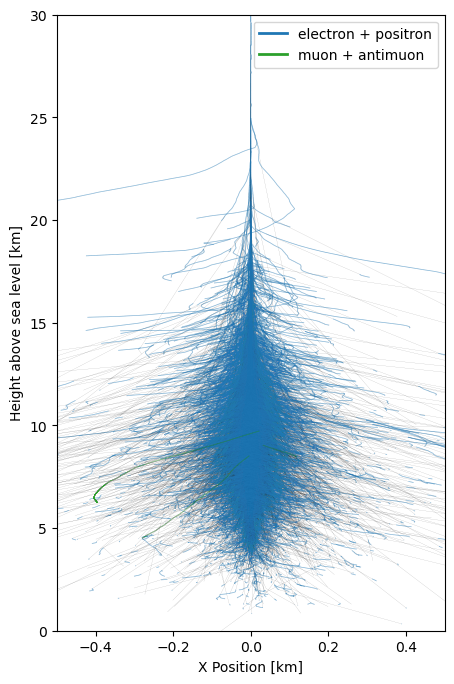

In [ ]:
import matplotlib.pyplot as plt
fig, ax0 = plt.subplots(1, 1, figsize=(5, 8))

#  We can also define a color dict to specify the plot color for different particles
color_dict = {
#  "hadron":'tab:red', 
#  'lepton':'tab:blue',
'electron + positron': 'tab:blue',
'muon + antimuon': 'tab:green',
# 'gamma': 'tab:orange'
}


# Now we plot the side profile
ax0 = CP.plot_side_profile(ax = ax0,
                           alpha=0.6, # Opacity of a single track
                           color_dict = color_dict,
)
plt.xlabel('X Position [km]')
plt.ylabel('Height above sea level [km]')
plt.xlim(-0.5, 0.5)
plt.show()
plt.close()


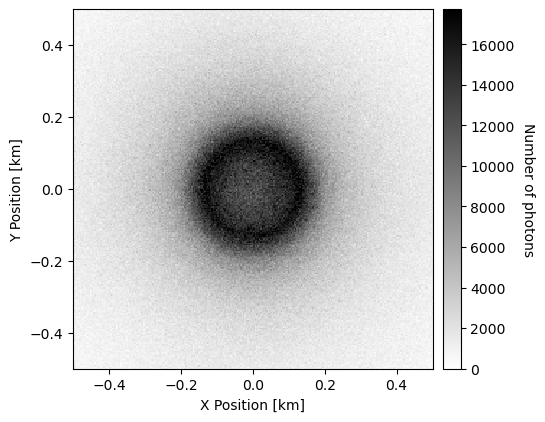

In [57]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1, 1, figsize=(5, 8))

ax1 = CP.plot_cher_distribution(
    ax = ax1,
    # use_log=True,
    auto_center=True,
    # show_colorbar=False,
    # cmap='hsv',
    # cmap='viridis',
    # vmin = 1,
    # vmax = 1000,
    nbins = 500
)

# Gamma
ax1.set_xlim(-0.5,0.5)
ax1.set_ylim(-0.5,0.5)

plt.show()
plt.close()


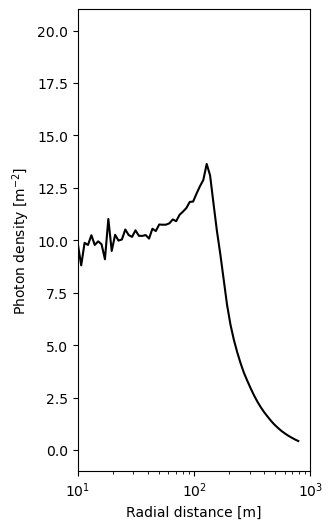

In [58]:
# We can also plot the cherenkov photon density on ground vs. radial distance 
# Note: The current implementation is only valid for showers generated with a zenith angle of zero
import matplotlib.pyplot as plt

ax = CP.plot_ground_photon_density(
    ax = None, 
    nbins = 200
)

plt.show()

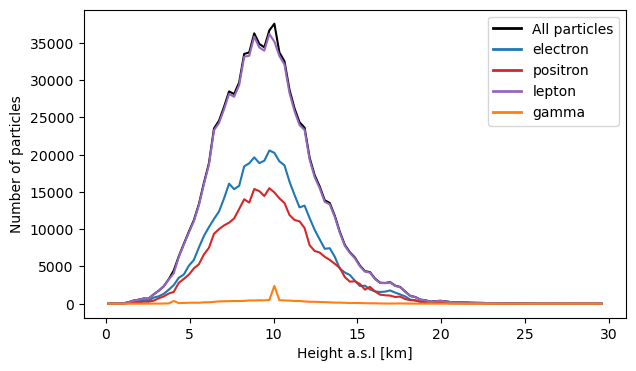

In [59]:
# Note: you can also highlight different particles with different colors 

color_dict = {
 "electron": "tab:blue",
 "positron": "tab:red",
'lepton':'tab:purple',
#  "muon + antimuon": "tab:green", # Note: the + combines all of these for the plot (multiple possible)
#  'hadron': 'tab:red',
'gamma':'tab:orange'
}

ax = CP.plot_particle_height_distribution(
    color_dict = color_dict,
    height_steps= 0.3
)
